# Explainable ML

### Modules and Libraries

In [10]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 992.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 995.0 kB/s eta 0:00:000:0100:01


In [73]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [70]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import shap
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [79]:
merged_df = pd.read_table('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/merged.hmp.h1.truth.cleaned.txt', index_col=0)

In [80]:
merged_df.head()

,Sex,Age,Class,BMI,Race,IR_IS,SSPG,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
SubjectID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZJTKAE3,F,58.65,Control,31.24,C,IR,162.0,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798
ZJXC41N,F,49.69,Prediabetic,28.24,B,IS,75.0,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.

In [47]:
# Add the columns to a list to be easily integrated
encoding_columns = ['Sex', 'Class', 'Race', 'IR_IS']
func_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = func_encoder.fit_transform(merged_df[encoding_columns])
encoded_columns = pd.DataFrame(encoded_columns, columns=func_encoder.get_feature_names_out(encoding_columns))

merged_df = merged_df.drop(columns=encoding_columns)
df_onehot = pd.concat([merged_df.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

display(df_onehot)

/Users/naifganadily/opt/anaconda3/envs/cv_humans/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,BMI,SSPG,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H,IR_IS_IS
0,58.65,31.24,162.00,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,49.69,28.24,75.00,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.000799,0.000639,0.000000,0.001917,0.002662,0.001810,0.000266,

In [48]:
df_onehot = df_onehot.drop(columns=['SSPG'])

In [49]:
X = df_onehot.drop(columns=['IR_IS_IS']) 
y = df_onehot['IR_IS_IS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
demographics = ['Age', 'BMI']
onehotencoded_columns = ['Sex_M', 'Class_Crossover', 'Class_Diabetic', 'Class_Prediabetic', 'Race_B', 'Race_C', 'Race_H']

In [51]:
scaler = StandardScaler()
X_train[demographics] = scaler.fit_transform(X_train[demographics])
X_test[demographics] = scaler.transform(X_test[demographics])

### Trying Different Normalization for Microbiome Data

In [52]:
microbiome_columns = [col for col in X_train.columns if col not in demographics and col not in onehotencoded_columns]

#### CLR + pseudo count

In [53]:
# To avoid zeros in the microbiome data
X_train[microbiome_columns] = X_train[microbiome_columns] + 1e-6
X_test[microbiome_columns] = X_test[microbiome_columns] + 1e-6
# CLR transformation
X_train[microbiome_columns] = np.log(X_train[microbiome_columns].div(X_train[microbiome_columns].sum(axis=1), axis=0))
X_test[microbiome_columns] = np.log(X_test[microbiome_columns].div(X_test[microbiome_columns].sum(axis=1), axis=0))

**I Skipped this for now:**

In [30]:
# X_train[microbiome_columns] = X_train[microbiome_columns].div(X_train[microbiome_columns].sum(axis=1), axis=0)
# X_test[microbiome_columns] = X_test[microbiome_columns].div(X_test[microbiome_columns].sum(axis=1), axis=0)

In [54]:
display(X_train.head())
display(X_test.head())

,Age,BMI,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H
36,-2.236158,-1.624119,-5.800665,-2.437918,-2.328261,-4.190201,-15.404636,-7.653362,-5.800665,-9.918326,-2.437918,-4.227608,-2.366220,-7.524203,-6.977818,-11.008953,-5.977583,-15.404636,-7.653362,-9.073398,-2.437918,-4.227608,-2.366220,-5.806085,-7.524203,-11.008953,-6.977818,-9.918326,-5.977583,-15.404636,-7.653362,-9.073398,-5.990569,-3.211542,-8.381140,-8.940088,-5.806085,-7.524203,-11.008953,-6.977818,-4.218680,-6.960430,-4.503399,-10.321717,-3.334920,-2.573671,-10.321717,-4.227608,-10.321717,-15.404636,-7.653362,-6.477661,-9.073398,-15.404636,-3.334920,-8.455180,-9.918326,-3.211542,-15.404636,-8.717256,-6.578290,-7.465384,-6.405844,-8.622059,-6.960430,-7.929479,-7.619475,-7.465384,-8.381140,-7.409833,-15.404636,-7.619475,-9.227250,-10.321717,-3.254243,-6.510092,-9.227250,-4.656316,-7.259598,-4.327749,-4.824619,-8.622059,-5.990569,-15.404636,-8.622059,-7.929479,-8.940088,-10.321717,-10.321717,-7.653362,-6.477661,-9.918326,-6.877756,-7.801713,-9.073398,-6.267391,-7.283122,-3.845589,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,-0.471859,2.583076,-6.651686,-2.615356,-2.107752,-7.142707,-15.414344,-5.225285,-6.651686,-10.845838,-2.615356,-7.560310,-2.156685,-8.552902,-6.345560,-15.414344,-5.583481,-15.414344,-5.225285,-8.216728,-2.615356,-7.560310,-2.156685,-6.681986,-8.552902,-15.414344,-6.345560,-10.845838,-5.583481,-15.414344,-5.225285,-8.216728,-5.588622,-5.132915,-15.414344,-9.467623,-6.681986,-8.552902,-15.414344,-6.345560,-3.180520,-8.552902,-2.807104,-6.345560,-6.745489,-3.187501,-10.845838,-7.720585,-10.845838,-15.414344,-5.225285,-3.423453,-8.216728,-15.414344,-6.7454

,Age,BMI,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H
0,0.218579,0.535610,-5.864735,-2.110673,-2.779898,-3.831988,-10.529826,-8.887471,-5.864735,-8.508457,-2.110673,-4.690598,-2.877048,-5.874124,-6.150525,-8.744571,-5.682425,-10.529826,-8.887471,-12.108805,-2.110673,-4.690598,-2.877048,-5.926407,-5.874124,-8.744571,-6.150525,-9.372039,-5.682425,-10.529826,-8.887471,-12.108805,-5.688675,-2.194843,-7.727762,-8.887471,-5.926407,-5.874124,-8.744571,-6.150525,-3.741475,-9.311558,-4.966214,-12.108805,-5.876012,-3.470993,-9.436414,-4.690598,-10.751026,-10.529826,-8.887471,-7.116381,-12.108805,-10.529826,-5.876012,-9.745621,-10.195579,-2.194843,-15.385949,-5.874124,-5.498039,-7.941797,-12.108805,-10.062744,-9.311558,-8.887471,-7.122936,-7.680716,-7.727762,-11.035671,-7.464581,-6.158015,-7.359256,-9.149384,-3.694732,-6.879015,-10.195579,-4.681970,-7.428226,-6.347863,-5.184794,-4.690598,-5.688675,-15.385949,-9.254527,-12.108805,-10.348802,-9.436414,-10.751026,-8.887471,-7.116381,-9.372039,-6.286177,-6.315077,-12.108805,-5.055300,-7.170071,-5.853583,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.677019,0.361869,-8.573919,-2.412786,-2.307785,-5.551645,-5.746915,-5.259694,-8.573919,-10.303553,-2.413096,-6.000947,-2.339595,-8.881019,-6.269359,-10.303553,-7.428180,-5.760925,-5.259694,-7.428180,-2.413096,-6.000947,-2.340229,-8.698940,-8.921781,-11.391080,-6.269359,-10.303553,-7.428180,-5.760925,-5.259694,-7.428180,-7.428180,-2.627718,-12.066528,-8.573919,-8.698940,-8.921781,-11.391080,-6.269359,-3.243970,-7.838156,-4.592541,-9.795136,-5.056411,-3.072525,-10.484667,-6.032838,-15.416432,-5.760925,-5.259694,-4.575688,-7.428180,-5.760925,-5.056411,-9.

## Modeling For Feature Importance

In [55]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6667

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



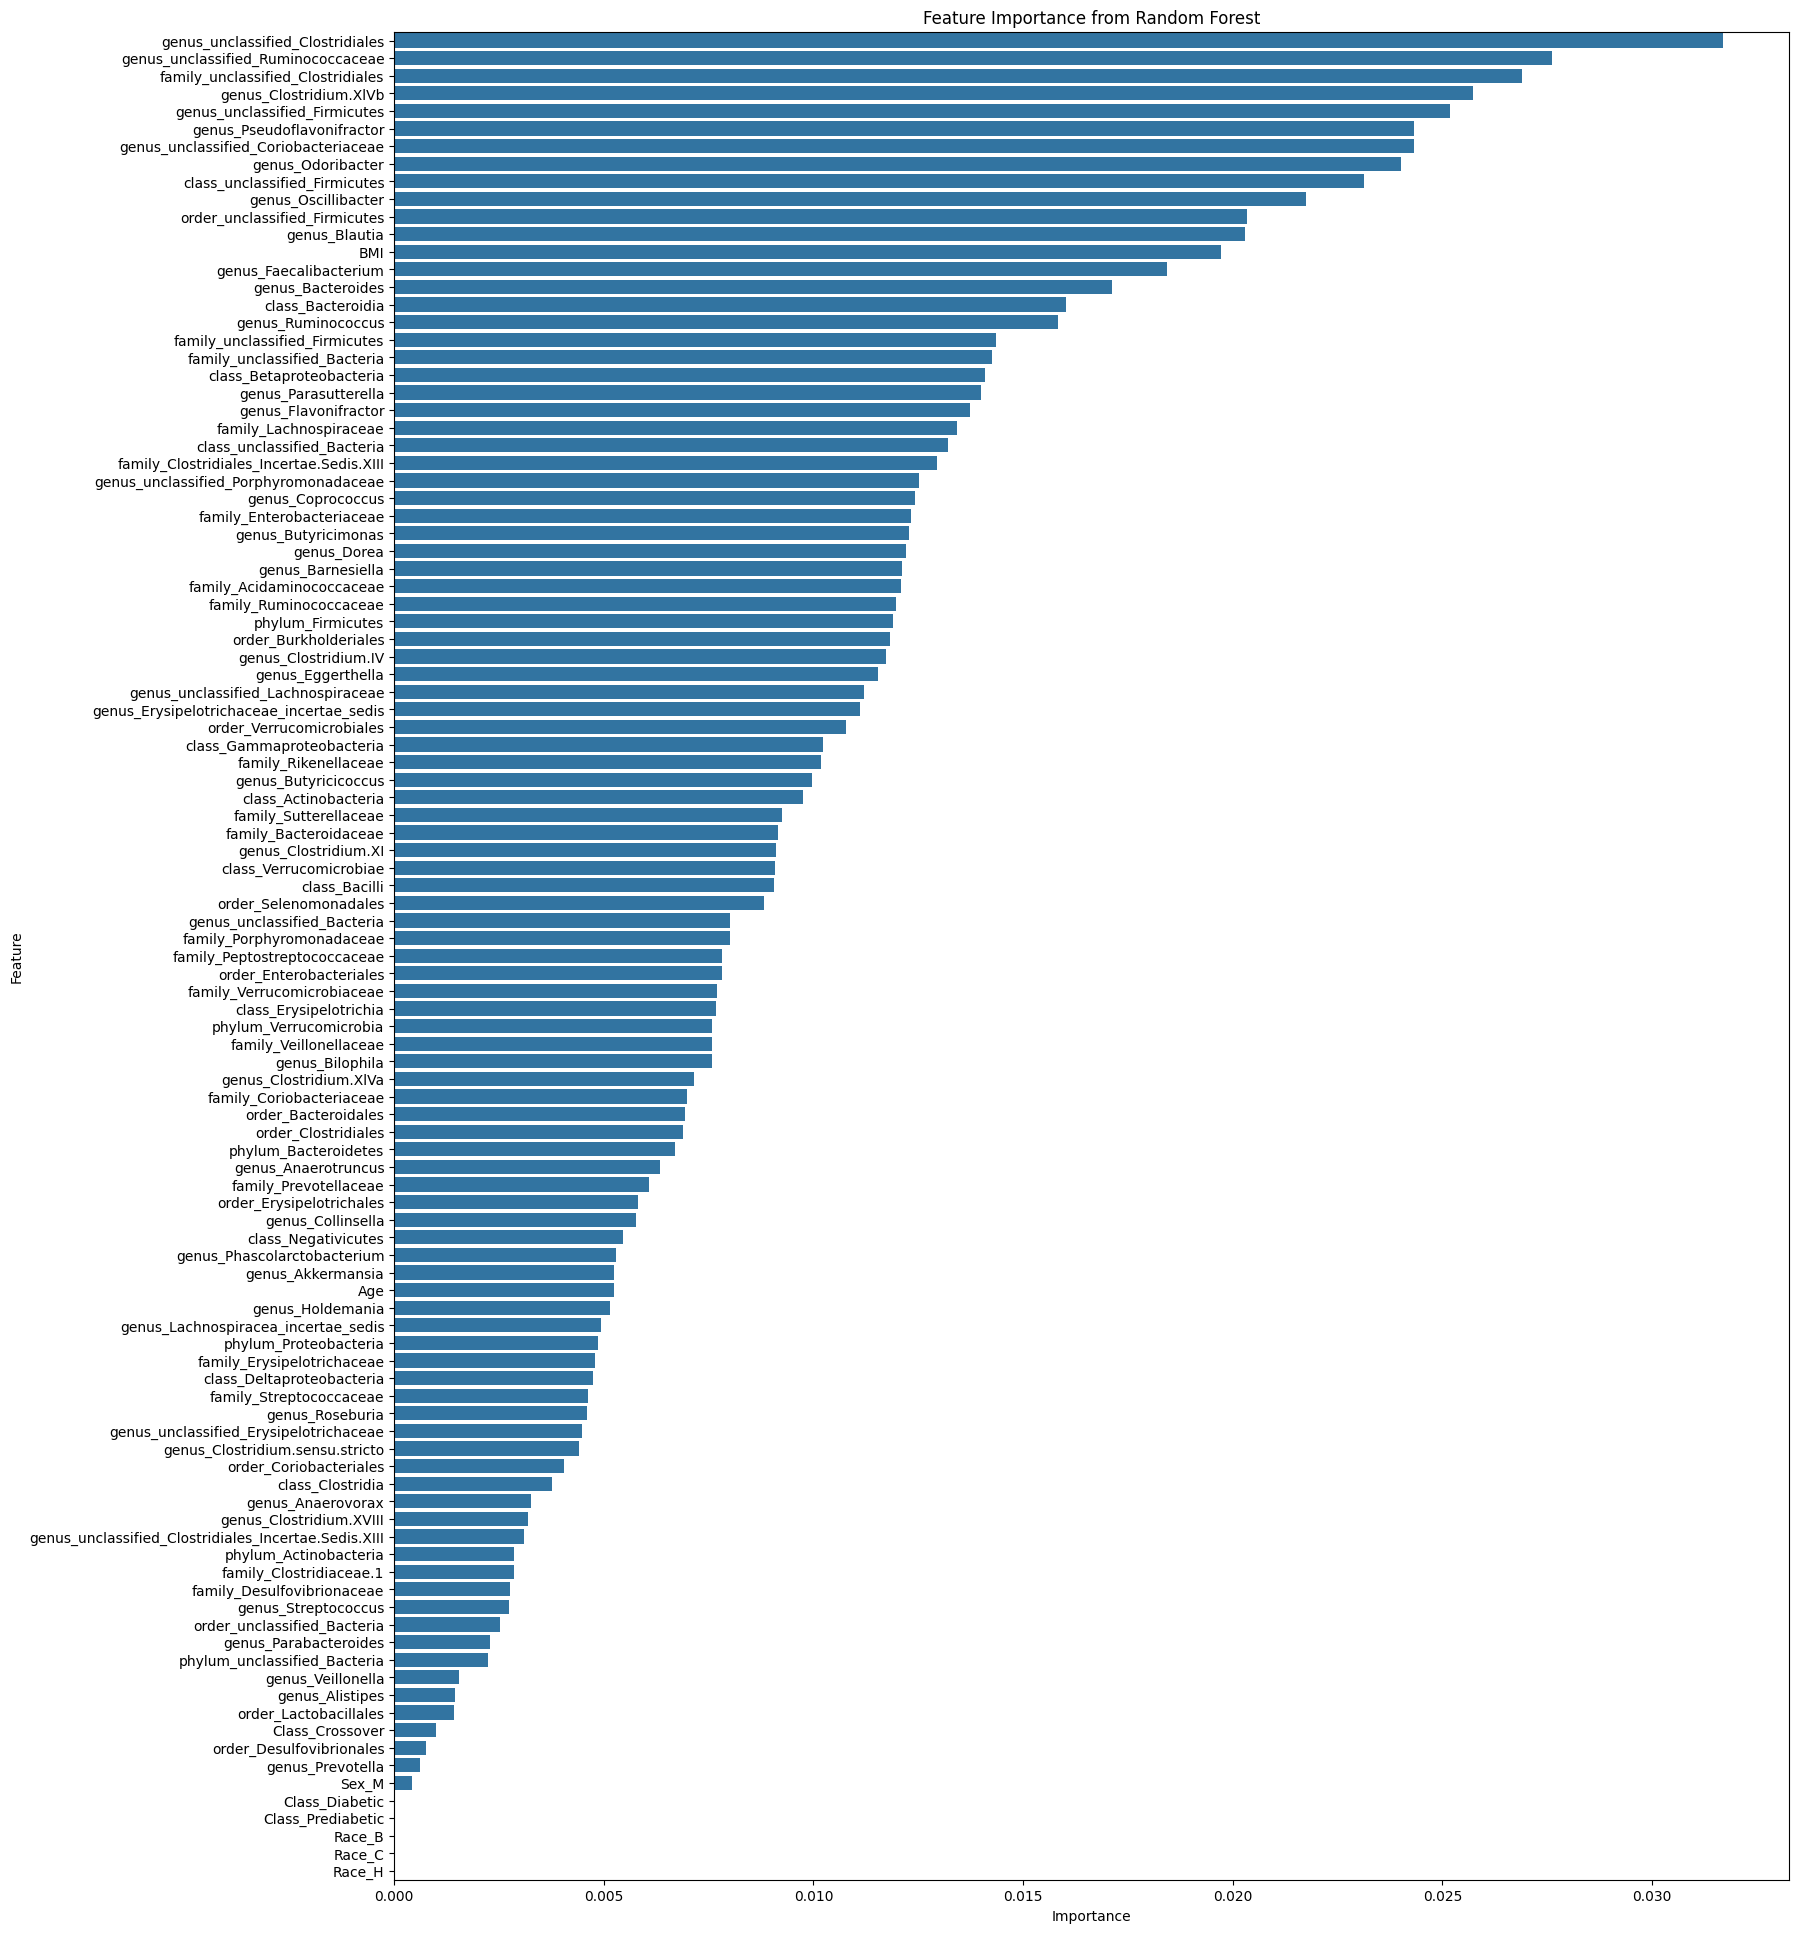

In [61]:
# Extract feature importance based on the documentation 
feature_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Lets try to remove some features from the dataset and see if we can improve the accuracy of the model. Lets start with removing features with a lower threshold of 0.005

In [62]:
# A threshold for feature importance
threshold = 0.005
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the model 
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)


y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.6667

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



In [63]:
# A threshold for feature importance again to see if it changes anything
threshold = 0.015
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.6667

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



In [65]:
# A threshold for feature importance one last time!
threshold = 0.020
important_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
print(f"Accuracy with reduced features: {accuracy_score(y_test, y_pred_reduced):.4f}")
print("\nClassification Report with reduced features:\n", classification_report(y_test, y_pred_reduced))

Accuracy with reduced features: 0.5000

Classification Report with reduced features:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         6
         1.0       0.50      0.50      0.50         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.50      0.50      0.50        12



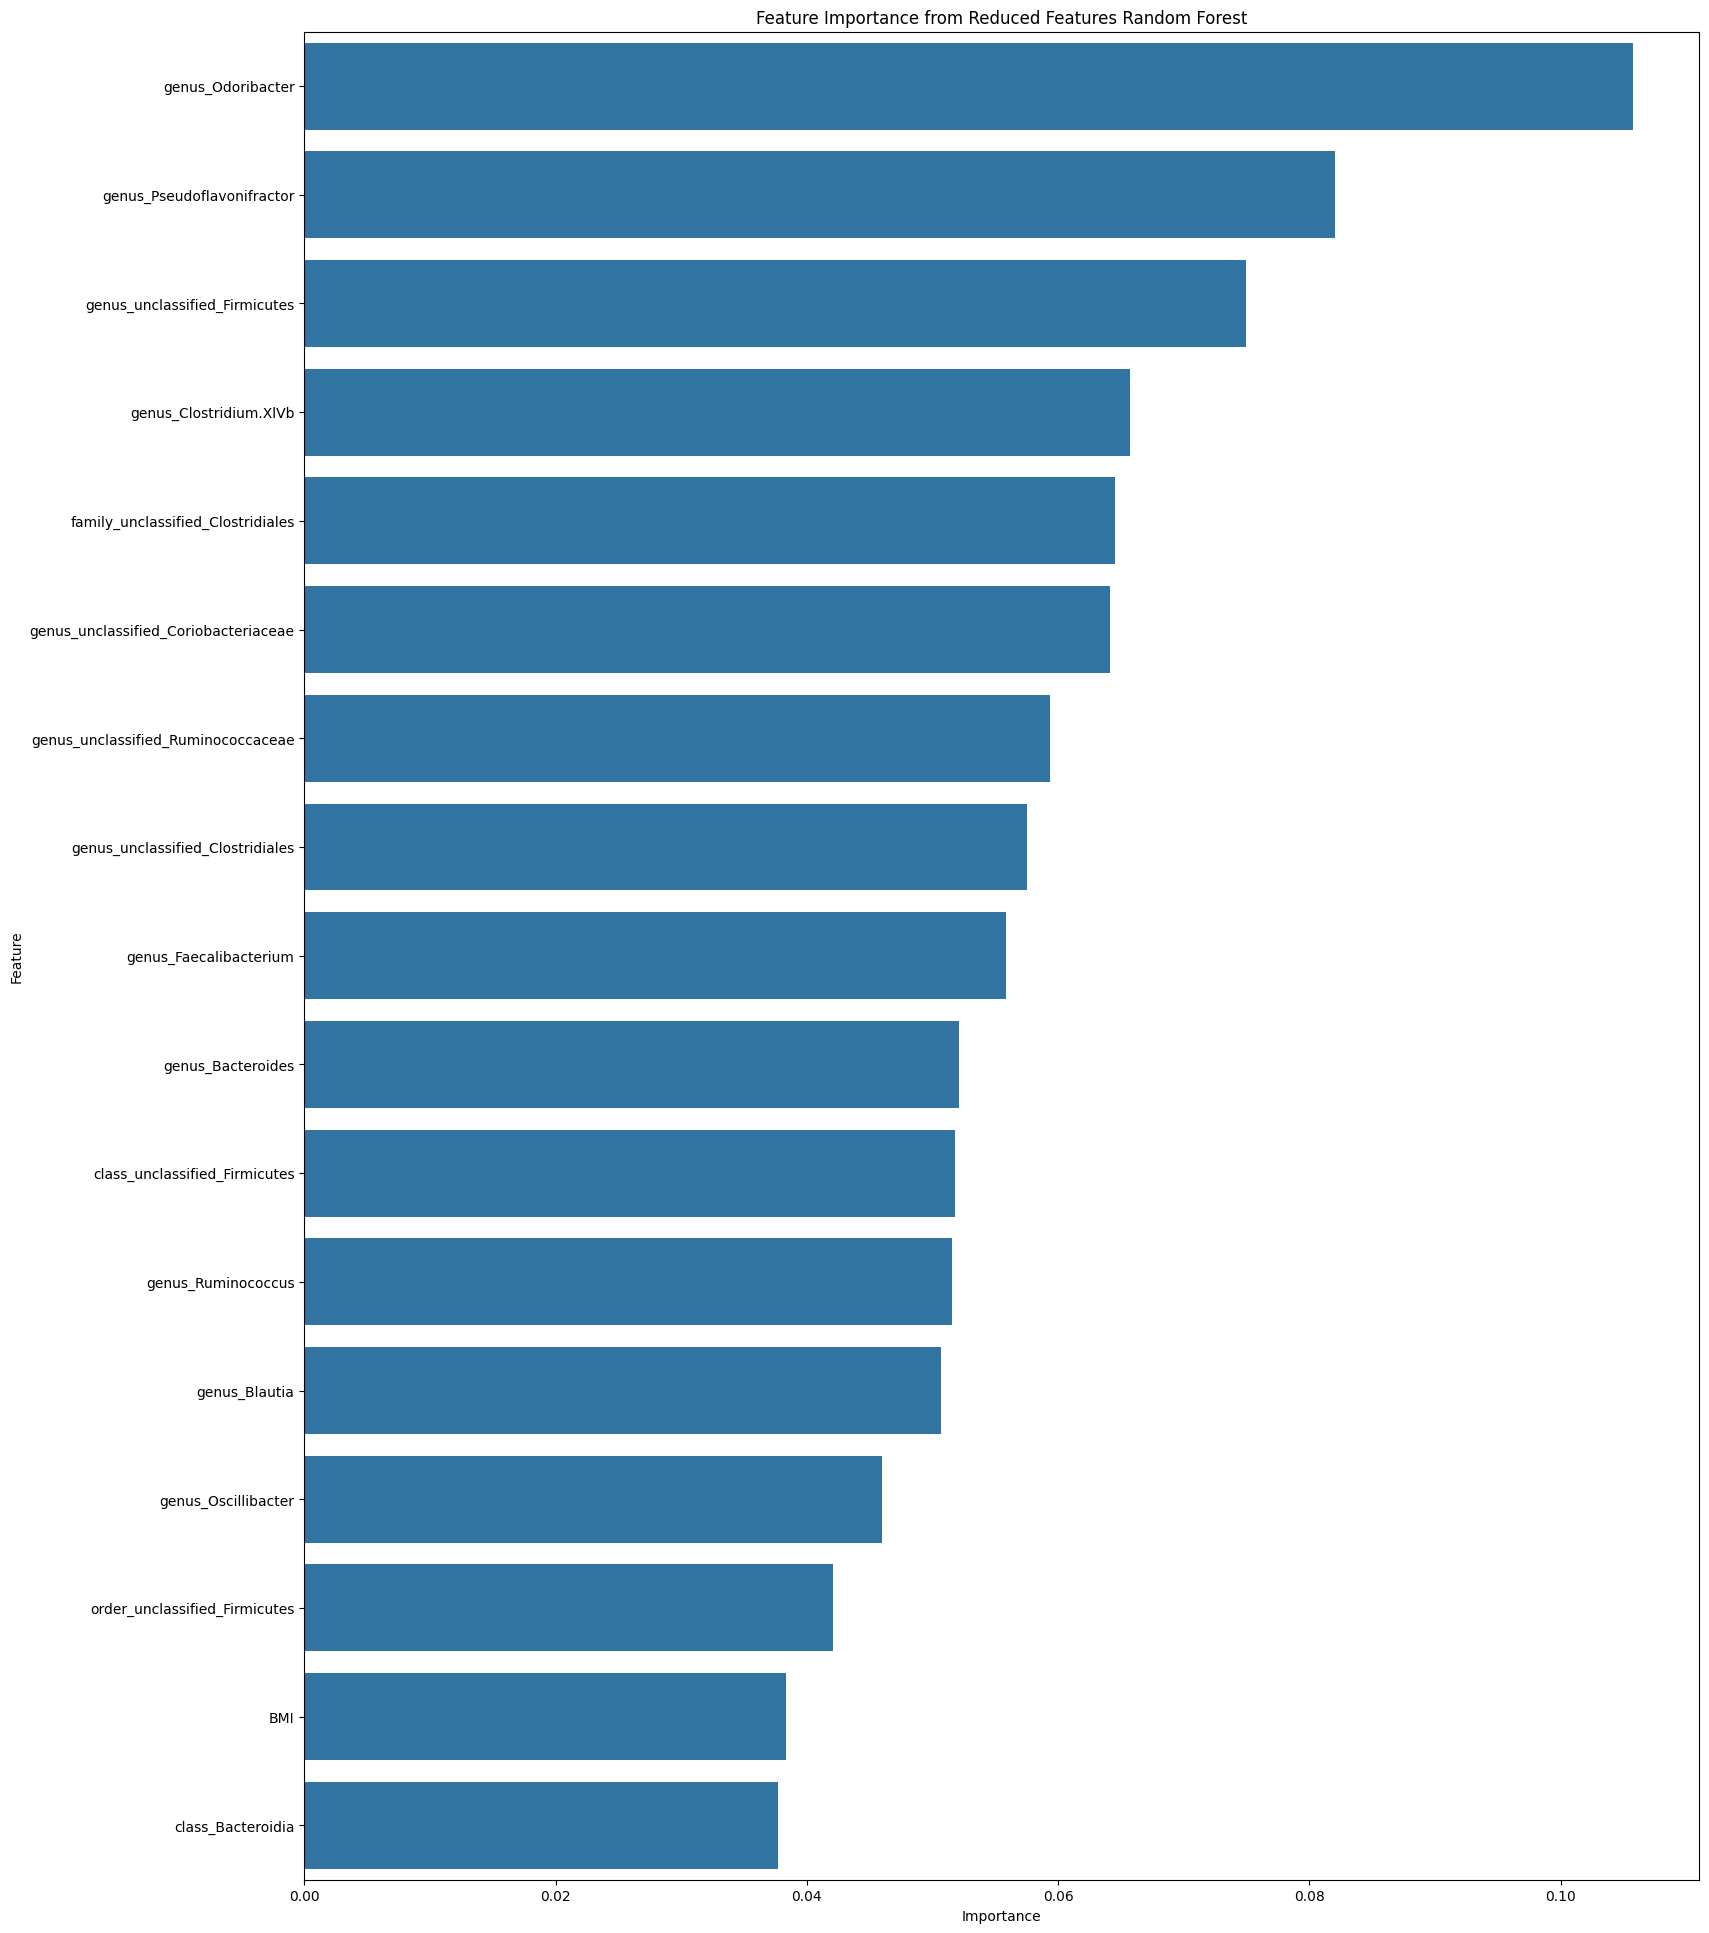

In [66]:
feature_importance = rf_model_reduced.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_reduced.columns, 
    'Importance': feature_importance
})

# Sort by feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Reduced Features Random Forest')
plt.show()

Apparently the features are not noise or that the features are redundant. Need some thoughts on this

In [68]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)
print(f"Accuracy with tuned model: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report with tuned model:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [71]:
# Cross-validation on the best-tuned model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.7222 ± 0.1142


**Prof. Li Liu was right if we have a small dataset the cros 

In [74]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest on the SMOTE-adjusted dataset
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
y_pred_smote = rf_model_smote.predict(X_test)
print(f"Accuracy with SMOTE: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\nClassification Report with SMOTE:\n", classification_report(y_test, y_pred_smote))

Accuracy with SMOTE: 0.8333

Classification Report with SMOTE:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [75]:
cv_scores_smote = cross_val_score(rf_model_smote, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-Validation Accuracy with SMOTE: {cv_scores_smote.mean():.4f} ± {cv_scores_smote.std():.4f}")

Cross-Validation Accuracy with SMOTE: 0.7509 ± 0.1514


Not so well with the cross validation. Need to discuss this

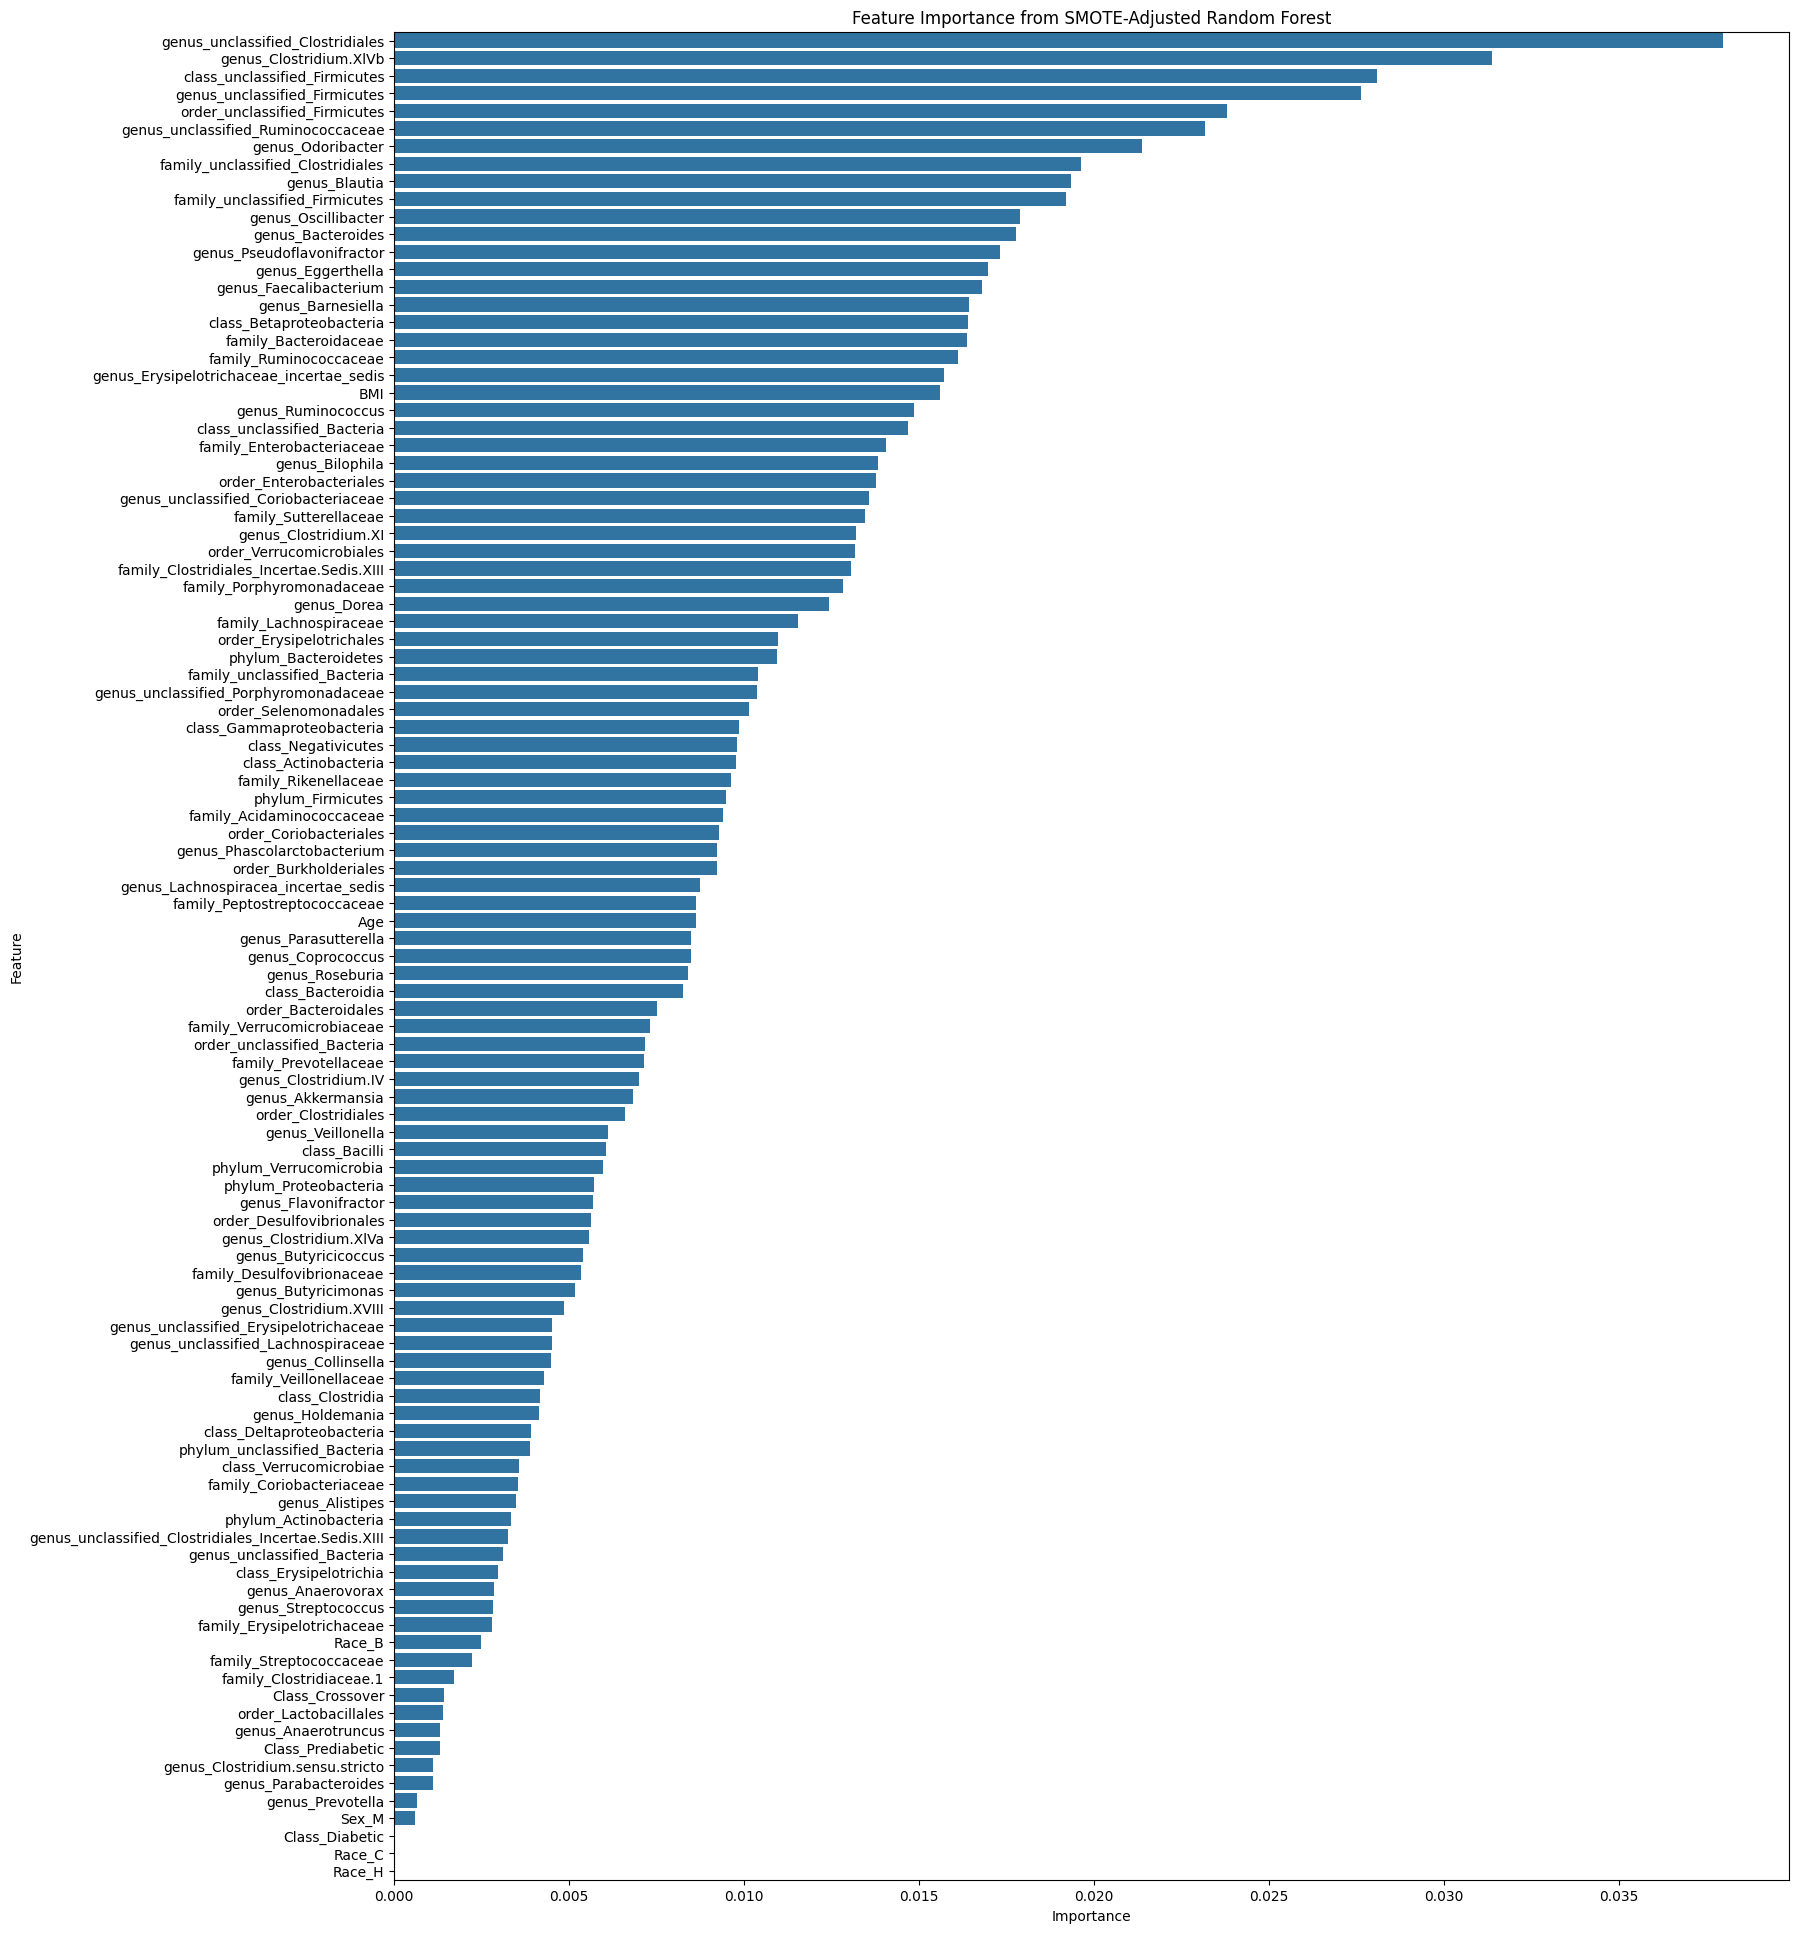

In [78]:
feature_importance_smote = rf_model_smote.feature_importances_
importance_df_smote = pd.DataFrame({
    'Feature': X_train.columns,  # Use original feature set
    'Importance': feature_importance_smote
})
importance_df_smote = importance_df_smote.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(18, 24))
sns.barplot(x='Importance', y='Feature', data=importance_df_smote)
plt.title('Feature Importance from SMOTE-Adjusted Random Forest')
plt.show()

Effects of SMOTE: Microbiome datasets often have unbalanced classes, whereby one condition (for example a particular disease state) is less represented than another (like healthy state). Synthetic Minority Over-Sampling Technique (SMOTE) that generates artificial samples on the smaller class balances this data set. This way, it can develop an even-handed model that can learn from both.

Since SMOTE significantly improved our model’s performance, it therefore means that our initial microbiome data had an imbalance problem and hence there was a bias in how the model learned. Random Forest model benefited from application of SMOTE as it was able to detect patterns in the minority class more effectively thereby enabling more precise and generalizable predictions.